In [1]:
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import tsfresh

df = pd.read_csv(r"C:\Users\AliHa\Desktop\Masters Project\main\raw_data\CSV Fridges data.csv")

df["device_id"] = df["device_id"].astype(int)
df["temperature"] = df["temperature"].apply(lambda x: x.replace(",","."))
df["temperature"] = df["temperature"].astype('float64') 
df["datetime"] = pd.to_datetime(df["datetime"], format = "%d.%m.%Y %H:%M:%S")

df["datetime"] = pd.to_datetime(df["datetime"])

#this is the method I used to give each day a different ID.
periods = df["datetime"].apply(lambda x: pd.Period(x,freq = "D").dayofyear)
year = df["datetime"].apply(lambda x: pd.Period(x,freq = "D").year)

df["doy"] = periods
df["year"] = year

doy_id = df["device_id"].astype("str") + ":" + df["year"].astype("str") + df["doy"].astype("str")


In [2]:
dict_temp = {'doy_id':doy_id, "temperature":df["temperature"], "datetime": df["datetime"]}
df_relevant = pd.DataFrame(dict_temp)
df_relevant.head()

settings =  tsfresh.feature_extraction.MinimalFCParameters()
extracted_features = tsfresh.feature_extraction.extract_features(df_relevant, 
                                              column_id = "doy_id",
                                              column_sort = "datetime",
                                              default_fc_parameters=settings,
                                              column_value = "temperature")

doy_id  temperature            datetime
0  31948:201913         20.3 2019-01-13 04:59:02
1  31948:201913         20.3 2019-01-13 05:02:01
2  31948:201913         20.3 2019-01-13 05:05:00
3  31948:201913         20.3 2019-01-13 05:07:59
4  31948:201913         20.3 2019-01-13 05:10:58

Feature Extraction: 100%|██████████| 30/30 [00:04<00:00,  7.41it/s]


In [37]:
extracted_presentation_features

temperature__sum_values  temperature__median  temperature__mean  \
31948                 676050.6                 10.3          13.065800   
47683                   7116.0                 28.6          27.796875   
48790                 467852.6                  4.7           5.455180   
49103                  41796.4                  4.6           4.403793   
49444                 152054.5                  5.5           5.180556   
49446                 332374.6                  5.0           5.135578   
49465                  98800.7                  5.9           5.909840   
49486                 460550.6                  3.9           6.006137   
49589                 333773.7                  5.1           5.236487   
52040                  21673.5                  2.1           2.166917   
52049                 224613.5                  4.4           4.916678   
52148                 292189.1                  5.8           6.278910   
59396                  17918.1                  3.7           5.484573   
59497                  15614.8                  1.4           2.416778   
59519                  10448.9                  1.6           1.889835   

       temperature__length  temperature__standard_deviation  \
31948              51742.0                         6.930165   
47683                256.0                         1.217576   
48790              85763.0                         3.291133   
49103               9491.0                         1.374817   
49444              29351.0                         2.199526   
49446              64720.0                         1.842817   
49465              16718.0                         1.129645   
49486              76680.0                         6.697082   
49589              63740.0                         1.955045   
52040              10002.0                         0.826327   
52049              45684.0                         2.174318   
52148              46535.0                         2.455085   
59396               3267.0                         5.634313   
59497               6461.0                         3.321598   
59519               5529.0                         0.806694   

       temperature__variance  temperature__root_mean_square  \
31948              48.027181                      14.789939   
47683               1.482490                      27.823529   
48790              10.831553                       6.371071   
49103               1.890122                       4.613406   
49444               4.837915                       5.628150   
49446               3.395975                       5.456201   
49465               1.276097                       6.016835   
49486              44.850911                       8.995810   
49589               3.822201                       5.589544   
52040               0.682816                       2.319126   
52049               4.727661                       5.376000   
52148               6.027442                       6.741822   
59396              31.745486                       7.862953   
59497              11.033014                       4.107776   
59519               0.650756                       2.054807   

       temperature__maximum  temperature__minimum  
31948                  32.0                  -1.0  
47683                  28.8                  25.3  
48790                  32.2                  -0.7  
49103                  24.7                  -1.6  
49444                  29.1                  -5.6  
49446                  27.5                  -3.1  
49465                  25.9                  -2.9  
49486                  33.2                   0.0  
49589                  32.5                   0.0  
52040                  27.2                   0.0  
52049                  28.3                  -1.8  
52148                  22.6                   3.3  
59396                  31.8                   3.1  
59497                  19.4                  -3.6  
59519                  2

In [36]:
df_relevant["device_id"]=df["device_id"]
settings =  tsfresh.feature_extraction.MinimalFCParameters()
extracted_presentation_features = tsfresh.feature_extraction.extract_features(df_relevant, 
                                              column_id = "device_id",
                                              column_sort = "datetime",
                                              default_fc_parameters=settings,
                                              column_value = "temperature")

Feature Extraction: 100%|██████████| 15/15 [00:02<00:00,  5.21it/s]


In [3]:
extracted_features = extracted_features[extracted_features.temperature__length < 485]
extracted_features = extracted_features.drop(columns = "temperature__length")
extracted_features

temperature__sum_values  temperature__median  \
31948:2019100                   3308.3                 6.75   
31948:2019101                   3093.7                 6.40   
31948:2019102                   3038.4                 6.30   
31948:2019103                   3092.8                 6.40   
31948:2019104                   3092.8                 6.40   
...                                ...                  ...   
59519:202010                     106.2                 1.75   
59519:202012                    1170.8                 2.50   
59519:202013                    1069.9                 2.50   
59519:202018                    1406.3                 2.80   
59519:202019                     761.6                 1.80   

               temperature__mean  temperature__standard_deviation  \
31948:2019100           6.863693                         0.356314   
31948:2019101           6.431809                         0.271912   
31948:2019102           6.290683                         0.230078   
31948:2019103           6.416598                         0.192425   
31948:2019104           6.403313                         0.165907   
...                          ...                              ...   
59519:202010            6.637500                         7.878918   
59519:202012            2.550763                         0.254832   
59519:202013            2.420588                         0.271591   
59519:202018            3.132071                         0.633543   
59519:202019            2.115556                         0.780336   

               temperature__variance  temperature__root_mean_square  \
31948:2019100               0.126960                       6.872935   
31948:2019101               0.073936                       6.437554   
31948:2019102               0.052936                       6.294889   
31948:2019103               0.037027                       6.419482   
31948:2019104               0.027525                       6.405462   
...                              ...                            ...   
59519:202010               62.077344                      10.302124   
59519:202012                0.064940                       2.563460   
59519:202013                0.073762                       2.435777   
59519:202018                0.401377                       3.195504   
59519:202019                0.608925                       2.254884   

               temperature__maximum  temperature__minimum  
31948:2019100                   7.6                   6.3  
31948:2019101                   7.1                   5.9  
31948:2019102                   7.0                   6.0  
31948:2019103                   7.0                   6.1  
31948:2019104                   6.8                   6.1  
...                             ...                   ...  
59519:202010                   21.8                   0.8  
59519:202012                    3.2                   2.0  
59519:202013                    3.0                   1.8  
59519:202018                    4.5                   2.3  
59519:202019                    4.1                   1.5  

[1099 rows x 8 columns]

In [4]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(extracted_features)

kmeans = KMeans(init = "random",
               n_clusters = 3,
               n_init = 10,
               random_state = 42
               )

kmeans.fit(scaled_features)
kmeans.inertia_
kmeans.cluster_centers_
#use kmeans.predict(scaled_features)

KMeans(init='random', n_clusters=3, random_state=42)

2150.921601769202

array([[ 3.65435715e-01,  5.03807781e-01,  6.59407463e-01,
         4.20411695e+00,  4.44204123e+00,  9.07741264e-01,
         2.17143607e+00, -3.55723010e-01],
       [-2.57115031e-01, -2.70647534e-01, -2.75475322e-01,
        -1.59596849e-01, -1.52482420e-01, -2.82886507e-01,
        -2.85162498e-01, -2.36158255e-01],
       [ 3.22825421e+00,  3.34415458e+00,  3.33734287e+00,
         2.00812065e-01, -9.57415448e-04,  3.32259252e+00,
         2.77976062e+00,  3.27855007e+00]])

In [5]:
clusters = kmeans.predict(scaled_features)
pd.Series(clusters).unique()

array([1, 2, 0], dtype=int64)

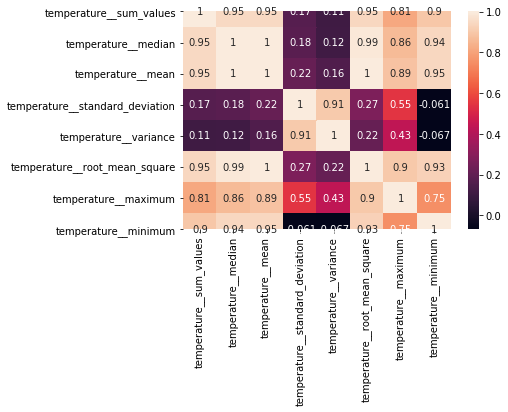

In [6]:
import seaborn as sn
import matplotlib as plt
scaled_df = pd.DataFrame(scaled_features, columns = extracted_features.columns)
covMatrix = pd.DataFrame.cov(scaled_df)
sn.heatmap(covMatrix,annot=True)

In [7]:
abs(covMatrix).min().min()
covMatrix

0.061257920615801945

temperature__sum_values  temperature__median  \
temperature__sum_values                         1.000911             0.950726   
temperature__median                             0.950726             1.000911   
temperature__mean                               0.950509             0.996793   
temperature__standard_deviation                 0.170516             0.182618   
temperature__variance                           0.111746             0.116085   
temperature__root_mean_square                   0.945439             0.991760   
temperature__maximum                            0.814153             0.864982   
temperature__minimum                            0.899987             0.942775   

                                 temperature__mean  \
temperature__sum_values                   0.950509   
temperature__median                       0.996793   
temperature__mean                         1.000911   
temperature__standard_deviation           0.215342   
temperature__variance                     0.157861   
temperature__root_mean_square             0.998073   
temperature__maximum                      0.885565   
temperature__minimum                      0.946131   

                                 temperature__standard_deviation  \
temperature__sum_values                                 0.170516   
temperature__median                                     0.182618   
temperature__mean                                       0.215342   
temperature__standard_deviation                         1.000911   
temperature__variance                                   0.905424   
temperature__root_mean_square                           0.273560   
temperature__maximum                                    0.549684   
temperature__minimum                                   -0.061258   

                                 temperature__variance  \
temperature__sum_values                       0.111746   
temperature__median                           0.116085   
temperature__mean                             0.157861   
temperature__standard_deviation               0.905424   
temperature__variance                         1.000911   
temperature__root_mean_square                 0.215106   
temperature__maximum                          0.434886   
temperature__minimum                         -0.067360   

                                 temperature__root_mean_square  \
temperature__sum_values                               0.945439   
temperature__median                                   0.991760   
temperature__mean                                     0.998073   
temperature__standard_deviation                       0.273560   
temperature__variance                                 0.215106   
temperature__root_mean_square                         1.000911   
temperature__maximum                                  0.904056   
temperature__minimum                                  0.928090   

                                 temperature__maximum  temperature__minimum  
temperature__sum_values                      0.814153              0.899987  
temperature__median                          0.864982              0.942775  
temperature__mean                            0.885565              0.946131  
temperature__standard_deviation              0.549684             -0.061258  
temperature__variance                        0.434886             -0.067360  
temperature__root_mean_square                0.904056              0.928090  
temperature__maximum                         1.000911              0.750603  
temperature__minimum                         0.750603              1.000911

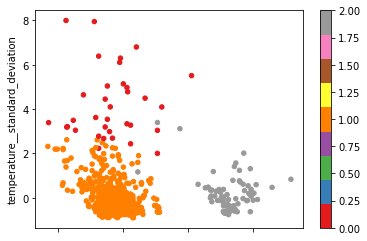

In [8]:
import matplotlib.cm as cm

scaled_df.plot.scatter(x="temperature__minimum", y="temperature__standard_deviation", c = clusters, cmap = cm.Set1)

#Create example timeseries that are representative of the clusters
#choose a timeseries close to the center of the clusters

In [9]:
settings =  tsfresh.feature_extraction.ComprehensiveFCParameters()
comprehensive_features = tsfresh.feature_extraction.extract_features(df_relevant, 
                                              column_id = "doy_id",
                                              column_sort = "datetime",
                                              default_fc_parameters=settings,
                                              column_value = "temperature")

Feature Extraction: 100%|██████████| 30/30 [01:37<00:00,  3.25s/it]


In [10]:
comprehensive_features

temperature__variance_larger_than_standard_deviation  \
31948:2019100                                                0.0      
31948:2019101                                                0.0      
31948:2019102                                                0.0      
31948:2019103                                                0.0      
31948:2019104                                                0.0      
...                                                          ...      
59519:202015                                                 0.0      
59519:202016                                                 0.0      
59519:202017                                                 0.0      
59519:202018                                                 0.0      
59519:202019                                                 0.0      

               temperature__has_duplicate_max  temperature__has_duplicate_min  \
31948:2019100                             1.0                             1.0   
31948:2019101                             0.0                             1.0   
31948:2019102                             1.0                             1.0   
31948:2019103                             1.0                             1.0   
31948:2019104                             1.0                             1.0   
...                                       ...                             ...   
59519:202015                              1.0                             1.0   
59519:202016                              1.0                             1.0   
59519:202017                              0.0                             0.0   
59519:202018                              0.0                             1.0   
59519:202019                              1.0                             1.0   

               temperature__has_duplicate  temperature__sum_values  \
31948:2019100                         1.0                   3308.3   
31948:2019101                         1.0                   3093.7   
31948:2019102                         1.0                   3038.4   
31948:2019103                         1.0                   3092.8   
31948:2019104                         1.0                   3092.8   
...                                   ...                      ...   
59519:202015                          1.0                   1563.2   
59519:202016                          1.0                   1536.8   
59519:202017                          1.0                    935.2   
59519:202018                          1.0                   1406.3   
59519:202019                          1.0                    761.6   

               temperature__abs_energy  temperature__mean_abs_change  \
31948:2019100                 22768.35                      0.047609   
31948:2019101                 19933.65                      0.067708   
31948:2019102                 19139.18                      0.067427   
31948:2019103                 19863.10                      0.055925   
31948:2019104                 19817.46                      0.061618   
...                                ...                           ...   
59519:202015                   2533.88                      0.004352   
59519:202016                   2453.76                      0.004777   
59519:202017                   1647.10                      0.024957   
59519:202018                   4584.85                      0.012500   
59519:202019                   1830.42                      0.016156   

               temperature__mean_change  \
31948:2019100                  0.000208   
31948:2019101                 -0.000625   
31948:2019102                 -0.000207   
31948:2019103                  0.001040   
31948:2019104                 -0.001452   
...                                 ...   
59519:202015                   0.000000   
59519:202016                   0.000000   
59519:202017                   0.004103   
59519:202018                  -0.004911   
59519:2020

In [11]:
nan_columns = comprehensive_features.columns[comprehensive_features.isna().any()].tolist()
comprehensive_features = comprehensive_features.drop(columns=nan_columns)
comprehensive_features

temperature__variance_larger_than_standard_deviation  \
31948:2019100                                                0.0      
31948:2019101                                                0.0      
31948:2019102                                                0.0      
31948:2019103                                                0.0      
31948:2019104                                                0.0      
...                                                          ...      
59519:202015                                                 0.0      
59519:202016                                                 0.0      
59519:202017                                                 0.0      
59519:202018                                                 0.0      
59519:202019                                                 0.0      

               temperature__has_duplicate_max  temperature__has_duplicate_min  \
31948:2019100                             1.0                             1.0   
31948:2019101                             0.0                             1.0   
31948:2019102                             1.0                             1.0   
31948:2019103                             1.0                             1.0   
31948:2019104                             1.0                             1.0   
...                                       ...                             ...   
59519:202015                              1.0                             1.0   
59519:202016                              1.0                             1.0   
59519:202017                              0.0                             0.0   
59519:202018                              0.0                             1.0   
59519:202019                              1.0                             1.0   

               temperature__has_duplicate  temperature__sum_values  \
31948:2019100                         1.0                   3308.3   
31948:2019101                         1.0                   3093.7   
31948:2019102                         1.0                   3038.4   
31948:2019103                         1.0                   3092.8   
31948:2019104                         1.0                   3092.8   
...                                   ...                      ...   
59519:202015                          1.0                   1563.2   
59519:202016                          1.0                   1536.8   
59519:202017                          1.0                    935.2   
59519:202018                          1.0                   1406.3   
59519:202019                          1.0                    761.6   

               temperature__abs_energy  temperature__mean_abs_change  \
31948:2019100                 22768.35                      0.047609   
31948:2019101                 19933.65                      0.067708   
31948:2019102                 19139.18                      0.067427   
31948:2019103                 19863.10                      0.055925   
31948:2019104                 19817.46                      0.061618   
...                                ...                           ...   
59519:202015                   2533.88                      0.004352   
59519:202016                   2453.76                      0.004777   
59519:202017                   1647.10                      0.024957   
59519:202018                   4584.85                      0.012500   
59519:202019                   1830.42                      0.016156   

               temperature__mean_change  \
31948:2019100                  0.000208   
31948:2019101                 -0.000625   
31948:2019102                 -0.000207   
31948:2019103                  0.001040   
31948:2019104                 -0.001452   
...                                 ...   
59519:202015                   0.000000   
59519:202016                   0.000000   
59519:202017                   0.004103   
59519:202018                  -0.004911   
59519:2020

In [12]:
comprehensive_scaler = StandardScaler()
scaled_comprehensive = comprehensive_scaler.fit_transform(comprehensive_features)

kmeans_comprehensive = KMeans(init = "random",
               n_clusters = 3,
               n_init = 10,
               random_state = 42
               )

kmeans_comprehensive.fit(scaled_comprehensive)
kmeans_comprehensive.inertia_

KMeans(init='random', n_clusters=3, random_state=42)

220787.8036079529

In [13]:
scaled_comprehensive_df = pd.DataFrame(scaled_comprehensive, columns = comprehensive_features.columns)
covMatrix_comp = pd.DataFrame.cov(scaled_comprehensive_df)
scaled_comprehensive_df

temperature__variance_larger_than_standard_deviation  \
0                                             -0.510185      
1                                             -0.510185      
2                                             -0.510185      
3                                             -0.510185      
4                                             -0.510185      
...                                                 ...      
1128                                          -0.510185      
1129                                          -0.510185      
1130                                          -0.510185      
1131                                          -0.510185      
1132                                          -0.510185      

      temperature__has_duplicate_max  temperature__has_duplicate_min  \
0                           0.694971                        0.369336   
1                          -1.438910                        0.369336   
2                           0.694971                        0.369336   
3                           0.694971                        0.369336   
4                           0.694971                        0.369336   
...                              ...                             ...   
1128                        0.694971                        0.369336   
1129                        0.694971                        0.369336   
1130                       -1.438910                       -2.707560   
1131                       -1.438910                        0.369336   
1132                        0.694971                        0.369336   

      temperature__has_duplicate  temperature__sum_values  \
0                            0.0                 0.245106   
1                            0.0                 0.145025   
2                            0.0                 0.119236   
3                            0.0                 0.144606   
4                            0.0                 0.144606   
...                          ...                      ...   
1128                         0.0                -0.568734   
1129                         0.0                -0.581046   
1130                         0.0                -0.861607   
1131                         0.0                -0.641906   
1132                         0.0                -0.942566   

      temperature__abs_energy  temperature__mean_abs_change  \
0                   -0.081219                     -0.298543   
1                   -0.134617                     -0.032070   
2                   -0.149583                     -0.035795   
3                   -0.135946                     -0.188290   
4                   -0.136806                     -0.112812   
...                       ...                           ...   
1128                -0.462386                     -0.872037   
1129                -0.463895                     -0.866410   
1130                -0.479090                     -0.598859   
1131                -0.423750                     -0.764016   
1132                -0.475637                     -0.715546   

      temperature__mean_change  temperature__mean_second_derivative_central  \
0                     0.069078                                    -0.099125   
1                     0.051740                                    -0.099195   
2                     0.060432                                    -0.065541   
3                     0.086389                                    -0.065541   
4                     0.034519                                    -0.065541   
...                        ...                                          ...   
1128                  0.064750                                    -0.065541   
1129                  0.064750                                    -0.065541   
1130                  0.150151                                    -0.065541   
1131                 -0.037473                                    -0.029479   
1132                  0.134331       

In [14]:
minimum_values = abs(covMatrix_comp).min()
minimum_values.sum()

0.0

In [15]:
# caterogical features are ok to not be correlated with others.
scaled_comprehensive_df.sum(axis=0) == 0

temperature__variance_larger_than_standard_deviation    False
temperature__has_duplicate_max                          False
temperature__has_duplicate_min                          False
temperature__has_duplicate                               True
temperature__sum_values                                 False
                                                        ...  
temperature__lempel_ziv_complexity__bins_5              False
temperature__lempel_ziv_complexity__bins_10             False
temperature__lempel_ziv_complexity__bins_100            False
temperature__permutation_entropy__dimension_3__tau_1    False
temperature__permutation_entropy__dimension_4__tau_1    False
Length: 251, dtype: bool

In [16]:
import numpy as np
zero_columns = list(np.where(scaled_comprehensive_df.sum(axis=0) == 0)[0])
zero_columns
zero_data = scaled_comprehensive_df.iloc[:, zero_columns]
zero_data

[3, 43, 93, 191, 206]

temperature__has_duplicate  temperature__symmetry_looking__r_0.0  \
0                            0.0                                   0.0   
1                            0.0                                   0.0   
2                            0.0                                   0.0   
3                            0.0                                   0.0   
4                            0.0                                   0.0   
...                          ...                                   ...   
1128                         0.0                                   0.0   
1129                         0.0                                   0.0   
1130                         0.0                                   0.0   
1131                         0.0                                   0.0   
1132                         0.0                                   0.0   

      temperature__partial_autocorrelation__lag_0  \
0                                             0.0   
1                                             0.0   
2                                             0.0   
3                                             0.0   
4                                             0.0   
...                                           ...   
1128                                          0.0   
1129                                          0.0   
1130                                          0.0   
1131                                          0.0   
1132                                          0.0   

      temperature__fft_coefficient__attr_"imag"__coeff_0  \
0                                                   0.0    
1                                                   0.0    
2                                                   0.0    
3                                                   0.0    
4                                                   0.0    
...                                                 ...    
1128                                                0.0    
1129                                                0.0    
1130                                                0.0    
1131                                                0.0    
1132                                                0.0    

      temperature__range_count__max_0__min_1000000000000.0  
0                                                   0.0     
1                                                   0.0     
2                                                   0.0     
3                                                   0.0     
4                                                   0.0     
...                                                 ...     
1128                                                0.0     
1129                                                0.0     
1130                                                0.0     
1131                                                0.0     
1132                                                0.0     

[1133 rows x 5 columns]

In [17]:
scaled_comprehensive_df = scaled_comprehensive_df.drop(columns = zero_data.columns)

In [18]:
scaled_comprehensive_df

temperature__variance_larger_than_standard_deviation  \
0                                             -0.510185      
1                                             -0.510185      
2                                             -0.510185      
3                                             -0.510185      
4                                             -0.510185      
...                                                 ...      
1128                                          -0.510185      
1129                                          -0.510185      
1130                                          -0.510185      
1131                                          -0.510185      
1132                                          -0.510185      

      temperature__has_duplicate_max  temperature__has_duplicate_min  \
0                           0.694971                        0.369336   
1                          -1.438910                        0.369336   
2                           0.694971                        0.369336   
3                           0.694971                        0.369336   
4                           0.694971                        0.369336   
...                              ...                             ...   
1128                        0.694971                        0.369336   
1129                        0.694971                        0.369336   
1130                       -1.438910                       -2.707560   
1131                       -1.438910                        0.369336   
1132                        0.694971                        0.369336   

      temperature__sum_values  temperature__abs_energy  \
0                    0.245106                -0.081219   
1                    0.145025                -0.134617   
2                    0.119236                -0.149583   
3                    0.144606                -0.135946   
4                    0.144606                -0.136806   
...                       ...                      ...   
1128                -0.568734                -0.462386   
1129                -0.581046                -0.463895   
1130                -0.861607                -0.479090   
1131                -0.641906                -0.423750   
1132                -0.942566                -0.475637   

      temperature__mean_abs_change  temperature__mean_change  \
0                        -0.298543                  0.069078   
1                        -0.032070                  0.051740   
2                        -0.035795                  0.060432   
3                        -0.188290                  0.086389   
4                        -0.112812                  0.034519   
...                            ...                       ...   
1128                     -0.872037                  0.064750   
1129                     -0.866410                  0.064750   
1130                     -0.598859                  0.150151   
1131                     -0.764016                 -0.037473   
1132                     -0.715546                  0.134331   

      temperature__mean_second_derivative_central  temperature__median  \
0                                       -0.099125             0.142879   
1                                       -0.099195             0.067183   
2                                       -0.065541             0.045555   
3                                       -0.065541             0.067183   
4                                       -0.065541             0.067183   
...                                           ...                  ...   
1128                                    -0.065541            -0.970936   
1129                                    -0.065541            -0.970936   
1130                                    -0.065541            -0.970936   
1131                                    -0.029479            -0.711406   
1132                                    -0.065541            -0.927681   

      temperature__mean  ...  temperature

In [19]:
covMatrix_comp = pd.DataFrame.cov(scaled_comprehensive_df)
abs(covMatrix_comp).min().min()

3.372940889853185e-06

In [20]:
covMatrix_comp

temperature__variance_larger_than_standard_deviation  \
temperature__variance_larger_than_standard_devi...                                           1.000883      
temperature__has_duplicate_max                                                              -0.203911      
temperature__has_duplicate_min                                                              -0.160553      
temperature__sum_values                                                                      0.175542      
temperature__abs_energy                                                                      0.204259      
...                                                                                               ...      
temperature__lempel_ziv_complexity__bins_5                                                  -0.185225      
temperature__lempel_ziv_complexity__bins_10                                                 -0.132885      
temperature__lempel_ziv_complexity__bins_100                                                 0.478928      
temperature__permutation_entropy__dimension_3__...                                           0.288015      
temperature__permutation_entropy__dimension_4__...                                           0.277121      

                                                    temperature__has_duplicate_max  \
temperature__variance_larger_than_standard_devi...                       -0.203911   
temperature__has_duplicate_max                                            1.000883   
temperature__has_duplicate_min                                            0.114303   
temperature__sum_values                                                  -0.029812   
temperature__abs_energy                                                  -0.046112   
...                                                                            ...   
temperature__lempel_ziv_complexity__bins_5                               -0.005511   
temperature__lempel_ziv_complexity__bins_10                              -0.076829   
temperature__lempel_ziv_complexity__bins_100                             -0.347099   
temperature__permutation_entropy__dimension_3__...                       -0.357730   
temperature__permutation_entropy__dimension_4__...                       -0.365068   

                                                    temperature__has_duplicate_min  \
temperature__variance_larger_than_standard_devi...                       -0.160553   
temperature__has_duplicate_max                                            0.114303   
temperature__has_duplicate_min                                            1.000883   
temperature__sum_values                                                  -0.035755   
temperature__abs_energy                                                  -0.042011   
...                                                                            ...   
temperature__lempel_ziv_complexity__bins_5                                0.033955   
temperature__lempel_ziv_complexity__bins_10                              -0.012682   
temperature__lempel_ziv_complexity__bins_100                             -0.181264   
temperature__permutation_entropy__dimension_3__...                       -0.115572   
temperature__permutation_entropy__dimension_4__...                       -0.108796   

                                                    temperature__sum_values  \
temperature__variance_larger_than_standard_devi...                 0.175542   
temperature__has_duplicate_max                                    -0.029812   
temperature__has_duplicate_min                                    -0.035755   
temperature__sum_values                                            1.000883   
temperature__abs_energy                                            0.964833   
...                                                                     ...   
temperature__lempel_ziv_complexity__bins_5                        -0.247817   
temperature__lempel_ziv_complexity__bins_10              

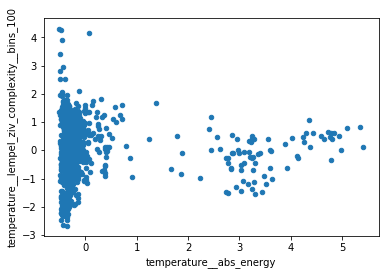

In [21]:
#lempel ziv is algorithm: how many bits to encode timeseries
#get copy of tsfresh from github and look into feature calculator
scaled_comprehensive_df.plot.scatter(x = "temperature__abs_energy", y ="temperature__lempel_ziv_complexity__bins_100")

In [22]:
abs(covMatrix_comp).min().idxmin()
abs(covMatrix_comp).idxmin()

'temperature__count_above_mean'

temperature__variance_larger_than_standard_deviation                       temperature__number_peaks__n_1
temperature__has_duplicate_max                                           temperature__benford_correlation
temperature__has_duplicate_min                          temperature__change_quantiles__f_agg_"mean"__i...
temperature__sum_values                                 temperature__change_quantiles__f_agg_"mean"__i...
temperature__abs_energy                                 temperature__change_quantiles__f_agg_"var"__is...
                                                                              ...                        
temperature__lempel_ziv_complexity__bins_5              temperature__large_standard_deviation__r_0.300...
temperature__lempel_ziv_complexity__bins_10             temperature__cwt_coefficients__coeff_3__w_5__w...
temperature__lempel_ziv_complexity__bins_100                                 temperature__quantile__q_0.2
temperature__permutation_entropy__dimension_3_

In [23]:
abs(covMatrix_comp['temperature__count_above_mean']).min()
abs(covMatrix_comp['temperature__count_above_mean']).idxmin()

3.372940889853185e-06

'temperature__change_quantiles__f_agg_"mean"__isabs_False__qh_0.2__ql_0.0'

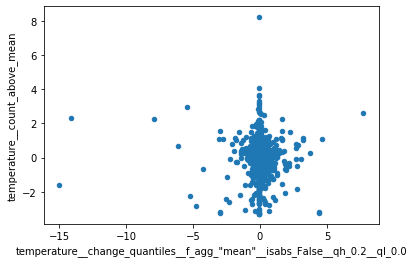

In [24]:
#not correlated but doesnt mean they are good to show clusters
scaled_comprehensive_df.plot.scatter(x = 'temperature__change_quantiles__f_agg_"mean"__isabs_False__qh_0.2__ql_0.0', y ="temperature__count_above_mean")

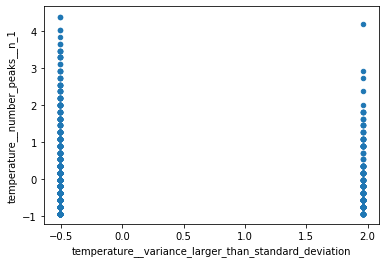

In [25]:
#temperature variance larger than standard deviation is important to look into as a caterogical variable
scaled_comprehensive_df.plot.scatter(x = 'temperature__variance_larger_than_standard_deviation', y ="temperature__number_peaks__n_1")

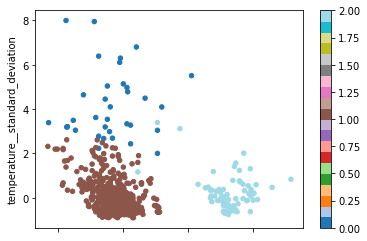

In [26]:
#Create a new feature where you use continuous features and multiply them with the categorical features.
#Think about feature selection

scaled_df.plot.scatter(x="temperature__minimum", y="temperature__standard_deviation", c = clusters, cmap = cm.tab20)

In [27]:
from sklearn.metrics import pairwise_distances_argmin_min
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, scaled_features)
closest

array([404, 719,  61], dtype=int64)

In [28]:
plot_ids = extracted_features.iloc[closest].index

In [29]:

plot1_data = df_relevant[df_relevant["doy_id"] == plot_ids[0]]
plot2_data = df_relevant[df_relevant["doy_id"] == plot_ids[1]]
plot3_data = df_relevant[df_relevant["doy_id"] == plot_ids[2]]

Text(0.5, 1.0, 'Plot Showing Clusters')

Text(0.5, 1.0, '49446:2019236 Single Day Temp Change')

Text(0.5, 1.0, '49589:2019220 Single Day Temp Change')

Text(0.5, 1.0, '31948:201950 Single Day Temp Change')

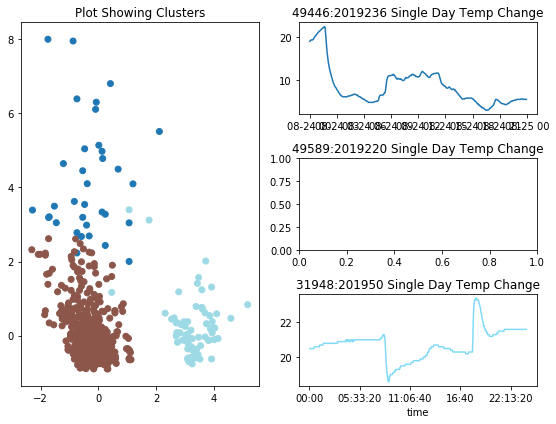

In [30]:
fig = plt.pyplot.figure(figsize=(8, 6))
gs = plt.gridspec.GridSpec(3, 2)

ax0 = plt.pyplot.subplot(gs[0:3,0])
ax0.scatter(x=scaled_df.temperature__minimum, y=scaled_df.temperature__standard_deviation, c = clusters, cmap = cm.tab20)
ax0.set_title("Plot Showing Clusters")
ax1 = plt.pyplot.subplot(gs[0,1])
ax1.plot(pd.to_datetime(plot1_data.datetime, format='%H:%M'), plot1_data.temperature)
ax1.set_title(str(plot_ids[0]) + " Single Day Temp Change")
ax2 = plt.pyplot.subplot(gs[1,1])
ax2.set_title(str(plot_ids[1]) + " Single Day Temp Change")
ax3 = plt.pyplot.subplot(gs[2,1])
ax3.plot(pd.to_datetime(plot3_data.datetime, format='%H:%M').dt.time, plot3_data.temperature,"#81daf5")
ax3.set_title(str(plot_ids[2]) + " Single Day Temp Change")
plt.pyplot.tight_layout()
plt.pyplot.show()